In [19]:
import numpy as np
import sklearn.decomposition

def pca_recover(X, Y):
    pca_input = np.array([X, Y]).T
    pca = sklearn.decomposition.PCA(n_components=2)
    pca.fit(pca_input)
    return pca.components_[0][1] / pca.components_[0][0]

def ls_recover(X, Y):
    X_mean = np.mean(X)
    Y_mean = np.mean(Y)
    numerator = np.dot(X - X_mean, Y - Y_mean)
    denominator = ((X - X_mean)**2).sum()
    return numerator / denominator

x = np.arange(0, 1.001, 0.001)
y = x * 2
assert abs(pca_recover(x, y) - 2) < 0.001
assert abs(ls_recover(x, y) - 2) < 0.001

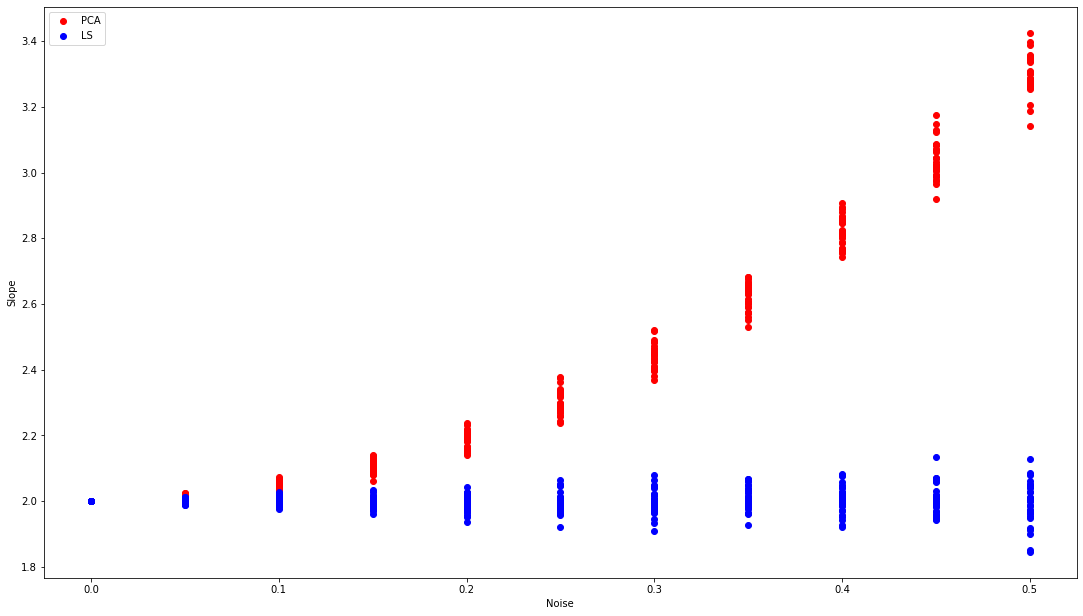

In [32]:
import matplotlib.pyplot as plt

x = np.arange(0.001, 1.001, 0.001)


cs = []
pcas = []
lss = []

for _ in range(30):
    for c in np.arange(0, 0.55, 0.05):
        ywn = 2 * x + np.random.randn(1000) * c
        pcas.append(pca_recover(x, ywn))
        lss.append(ls_recover(x, ywn))
        cs.append(c)

fig, ax1 = plt.subplots()
fig.set_size_inches(18.5, 10.5)

ax1.set_xlabel('Noise')
ax1.set_ylabel('Slope')
ax1.scatter(cs, pcas, color='red', label='PCA')
ax1.scatter(cs, lss, color='blue', label='LS')
ax1.legend()

plt.show()

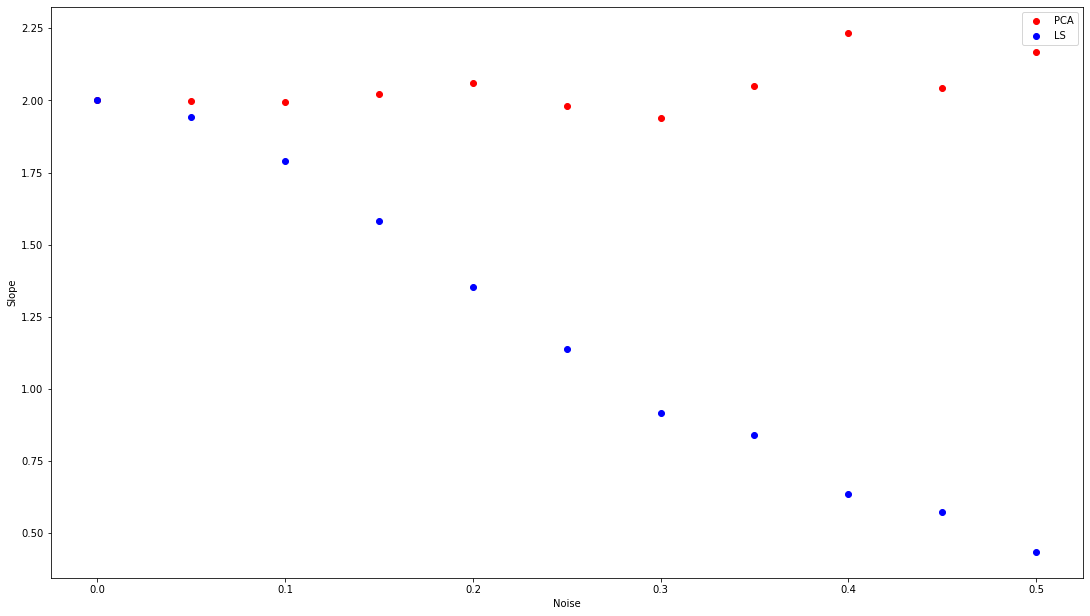

In [42]:
import matplotlib.pyplot as plt

x = np.arange(0.001, 1.001, 0.001)


cs = []
pcas = []
lss = []

for _ in range(1):
    for c in np.arange(0, 0.55, 0.05):
        xwn = np.arange(0, 1.000, 0.001) + np.random.randn(1000) * c
        ywn = 2 * np.arange(0, 1.000, 0.001) + np.random.randn(1000) * c
        pcas.append(pca_recover(xwn, ywn))
        lss.append(ls_recover(xwn, ywn))
        cs.append(c)

fig, ax1 = plt.subplots()
fig.set_size_inches(18.5, 10.5)

ax1.set_xlabel('Noise')
ax1.set_ylabel('Slope')
ax1.scatter(cs, pcas, color='red', label='PCA')
ax1.scatter(cs, lss, color='blue', label='LS')
ax1.legend()

plt.show()